### Moises Quiroz

# Preliminares

# Enunciado
Lo contactan de una escuela Portuguesa para generar un modelo que identifique aquellos alumnos
que presentan un bajo desempeño académico, medido en el promedio final del año escolar. Para ello
le envían un archivo con registros sociodemográficos y conductuales de los alumnos dos escuelas
para perfilar a los estudiantes.
De manera adicional la psicopedagoga sugiere inspeccionar una batería de preguntas asociadas a
aspectos ambientales del alumno (de famrel a health ) y ver si éstas se pueden abstraer en
categorías latentes.

# Aspectos computacionales


Se importan las librerias con las hemos trabajado durante todos los cursos de data science, de momento las funciones a realizar son simplemente para limpiar y binarizar la data, ademas de posteriormente crear modelos de regresion tanto de la vision desde la econometria, como del machine-learning

#### Se trata de un problema de regresion/prediccion ya que se intenta obtener el valor de la nota

In [86]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import  mean_squared_error , r2_score 
import statsmodels.formula.api as smf
from scipy import stats
import missingno as msngo

# Descripción

##### Se procede a inspeccionar la data

In [87]:
df = pd.read_csv('students.csv',sep='|')
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,nulidade,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,zero,8,10
3,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,GP,F,sem validade,U,GT3,T,3,3,other,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10


In [88]:
for i in df.columns:
    print('--------------------------')
    print('\nVariable:',i+'\n'+str(df[i].value_counts('%')))

--------------------------

Variable: school
GP              0.873418
MS              0.113924
sem validade    0.005063
zero            0.005063
nulidade        0.002532
Name: school, dtype: float64
--------------------------

Variable: sex
F               0.521519
M               0.470886
nulidade        0.002532
sem validade    0.002532
zero            0.002532
Name: sex, dtype: float64
--------------------------

Variable: age
"16"            0.255696
"17"            0.248101
"15"            0.207595
"18"            0.205063
"19"            0.060759
nulidade        0.007595
"20"            0.007595
"21"            0.002532
"22"            0.002532
sem validade    0.002532
Name: age, dtype: float64
--------------------------

Variable: address
U               0.772152
R               0.222785
sem validade    0.005063
Name: address, dtype: float64
--------------------------

Variable: famsize
GT3             0.703797
LE3             0.286076
sem validade    0.005063
zero            0.

##### Se procede a limpiar la data de las variables mal ingresadas

In [89]:
df = df.replace(['nulidade', 'sem validade', 'zero'],np.nan)

In [90]:
df = df.dropna()
for i in df.columns:
    print('--------------------------')
    print('\nVariable:',i+'\n'+str(df[i].value_counts('%')))

--------------------------

Variable: school
GP    0.869718
MS    0.130282
Name: school, dtype: float64
--------------------------

Variable: sex
F    0.517606
M    0.482394
Name: sex, dtype: float64
--------------------------

Variable: age
"16"    0.260563
"18"    0.246479
"15"    0.214789
"17"    0.211268
"19"    0.052817
"20"    0.010563
"21"    0.003521
Name: age, dtype: float64
--------------------------

Variable: address
U    0.753521
R    0.246479
Name: address, dtype: float64
--------------------------

Variable: famsize
GT3    0.735915
LE3    0.264085
Name: famsize, dtype: float64
--------------------------

Variable: Pstatus
T    0.90493
A    0.09507
Name: Pstatus, dtype: float64
--------------------------

Variable: Medu
4    0.345070
2    0.250000
3    0.246479
1    0.154930
0    0.003521
Name: Medu, dtype: float64
--------------------------

Variable: Fedu
2    0.271127
3    0.267606
4    0.239437
1    0.218310
0    0.003521
Name: Fedu, dtype: float64
-------------------

###### Ya que no existen datos perdidos, se procede a modificar los datos que presentan error de tipo

In [91]:
df['age'] = df['age'].replace(['"16"','"18"','"15"','"17"','"19"','"20"','"21"'],[16,18,15,17,19,20,21])
df.age.value_counts('%')

16    0.260563
18    0.246479
15    0.214789
17    0.211268
19    0.052817
20    0.010563
21    0.003521
Name: age, dtype: float64

In [92]:
df['goout'] = df['goout'].replace(['"3"','"2"','"4"','"5"','"1"'],[3,2,4,5,1])
df.age.value_counts('%')

16    0.260563
18    0.246479
15    0.214789
17    0.211268
19    0.052817
20    0.010563
21    0.003521
Name: age, dtype: float64

In [93]:
df['health'] = df['health'].replace(['"3"','"2"','"4"','"5"','"1"'],[3,2,4,5,1])
df.health.value_counts('%')

5    0.366197
3    0.257042
4    0.183099
2    0.098592
1    0.095070
Name: health, dtype: float64

##### Se codifican las variables binarias, creando un pequeño codigo

In [94]:
for i in df.columns:
    if len(df[i].value_counts('%')) ==2:
        print('--------------------------')
        print('\nVariable:',i+'\n'+str(df[i].value_counts('%')))
        df[i] = df[i].replace([df[i].value_counts('%').index[0],df[i].value_counts('%').index[1]],[0,1])
        print('\nVariable:',i+'\n'+str(df[i].value_counts('%')))

--------------------------

Variable: school
GP    0.869718
MS    0.130282
Name: school, dtype: float64

Variable: school
0    0.869718
1    0.130282
Name: school, dtype: float64
--------------------------

Variable: sex
F    0.517606
M    0.482394
Name: sex, dtype: float64

Variable: sex
0    0.517606
1    0.482394
Name: sex, dtype: float64
--------------------------

Variable: address
U    0.753521
R    0.246479
Name: address, dtype: float64

Variable: address
0    0.753521
1    0.246479
Name: address, dtype: float64
--------------------------

Variable: famsize
GT3    0.735915
LE3    0.264085
Name: famsize, dtype: float64

Variable: famsize
0    0.735915
1    0.264085
Name: famsize, dtype: float64
--------------------------

Variable: Pstatus
T    0.90493
A    0.09507
Name: Pstatus, dtype: float64

Variable: Pstatus
0    0.90493
1    0.09507
Name: Pstatus, dtype: float64
--------------------------

Variable: schoolsup
no     0.866197
yes    0.133803
Name: schoolsup, dtype: float64



##### Se procede a desarrollar un analisis grafico de los vectores objetivos

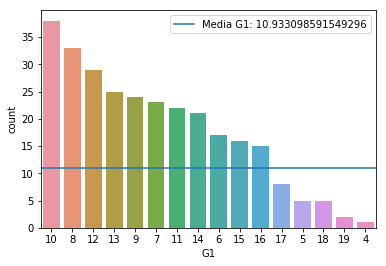

In [95]:
sns.countplot(x='G1',data=df,order=df['G1'].value_counts().index)
media = np.mean(list(map(int,df.G1.values)))
plt.axhline(media,label='Media G1: '+str(media))
plt.legend()

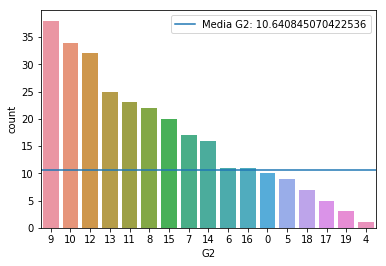

In [96]:
sns.countplot(x='G2',data=df,order=df['G2'].value_counts().index)
media = np.mean(list(map(int,df.G2.values)))
plt.axhline(media,label='Media G2: '+str(media))
plt.legend()

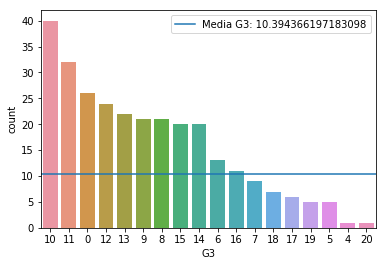

In [97]:
sns.countplot(x='G3',data=df,order=df['G3'].value_counts().index)
media = np.mean(list(map(int,df.G3.values)))
plt.axhline(media,label='Media G3: '+str(media))
plt.legend()

##### Se procede a analizar si aun quedan datos nan

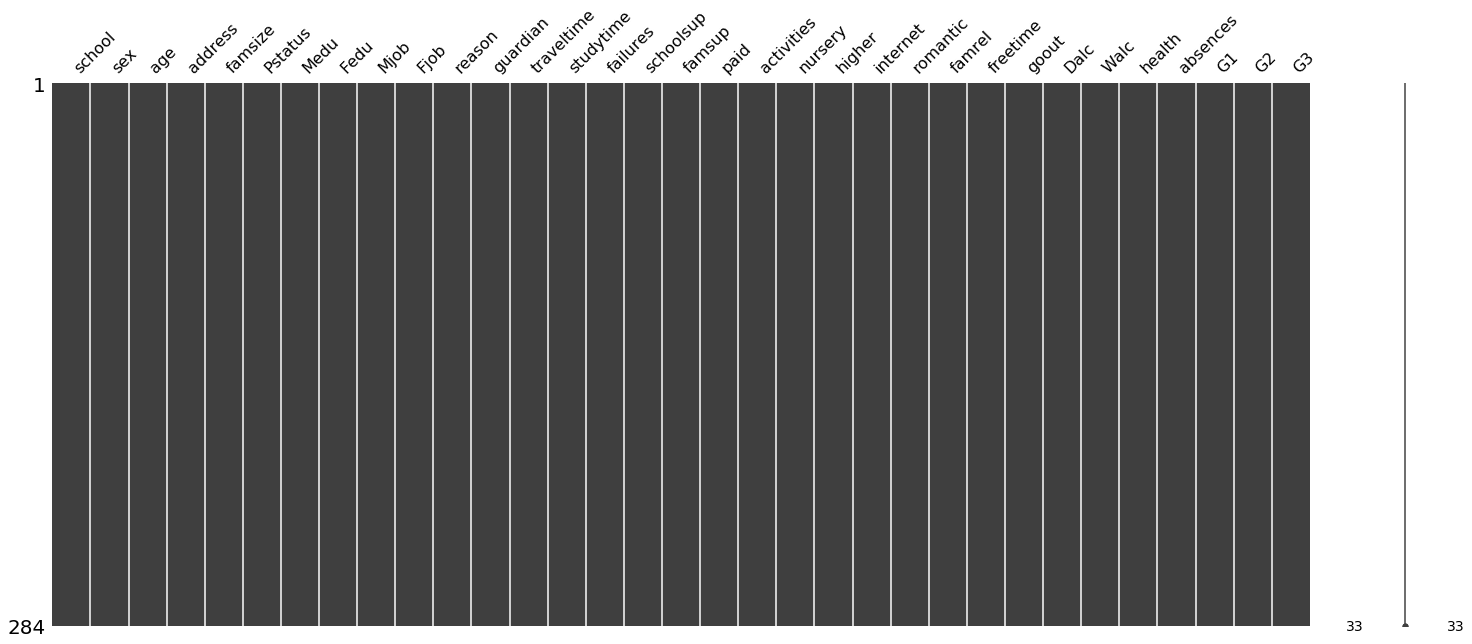

In [98]:
msngo.matrix(df)

* Se observaron que hay valores numericos como strings en el dataframe, para facilitar el analisis de transforman en int

In [99]:
df = df.replace(['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
df['absences']=np.array(list(map(int,df['absences'].values)))
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,0,0,17,0,0,0,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
3,0,0,15,0,0,0,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
5,0,1,16,0,1,0,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,0,1,16,0,1,0,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,0,0,17,0,0,1,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6


# Modelacion Descriptiva

In [100]:
for i in df.columns:
    print('--------------------------')
    print('\nVariable:',i+'\n'+str(df[i].value_counts('%')))

--------------------------

Variable: school
0    0.869718
1    0.130282
Name: school, dtype: float64
--------------------------

Variable: sex
0    0.517606
1    0.482394
Name: sex, dtype: float64
--------------------------

Variable: age
16    0.260563
18    0.246479
15    0.214789
17    0.211268
19    0.052817
20    0.010563
21    0.003521
Name: age, dtype: float64
--------------------------

Variable: address
0    0.753521
1    0.246479
Name: address, dtype: float64
--------------------------

Variable: famsize
0    0.735915
1    0.264085
Name: famsize, dtype: float64
--------------------------

Variable: Pstatus
0    0.90493
1    0.09507
Name: Pstatus, dtype: float64
--------------------------

Variable: Medu
4    0.345070
2    0.250000
3    0.246479
1    0.154930
0    0.003521
Name: Medu, dtype: float64
--------------------------

Variable: Fedu
2    0.271127
3    0.267606
4    0.239437
1    0.218310
0    0.003521
Name: Fedu, dtype: float64
--------------------------

Variable: M

In [101]:
df = pd.get_dummies(df,columns=['Mjob','Fjob','reason','guardian'],drop_first=True)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
1,0,0,17,0,0,0,1,1,1,2,...,0,0,1,0,0,0,0,0,0,0
3,0,0,15,0,0,0,4,2,1,3,...,0,0,0,1,0,1,0,0,1,0
5,0,1,16,0,1,0,4,3,1,2,...,0,0,1,0,0,0,0,1,1,0
6,0,1,16,0,1,0,2,2,1,2,...,0,0,1,0,0,1,0,0,1,0
7,0,0,17,0,0,1,4,4,2,2,...,0,0,0,0,1,1,0,0,1,0


In [102]:
#Se ejecuta un pequeño for para verificar que solo se traten de enteros, en caso de no retornar nada, todo es ok
for i in df.columns:
    for j in df[i]:
        if(type(j)!= int):
            print(i)
            print(j)

##### Finalmente las columnas tratadas son

In [103]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other'],
      dtype='object')

## Primeramente se hara un analisis incluyendo G1,G2 y G3 solamente para ver como se comporta el modelo incluyendo estas variables, luego se hara un procesamiento mas correcto para comparar

##### Se procede a implementar el modelo

* Modelo para G1

In [104]:
lista = list(df.columns)
lista.remove('G1')
modelo_str = ' + '.join(lista)
modelo_str = 'G1 ~ '+modelo_str
modelo_str
modelo = smf.ols(formula= str(modelo_str),data=df).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     22.81
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           3.18e-62
Time:                        11:18:05   Log-Likelihood:                -515.99
No. Observations:                 284   AIC:                             1116.
Df Residuals:                     242   BIC:                             1269.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.7519      1.962      0.383      0.702      -3.112       4.616
school               -0.6629      0.373     -1.779      0.077      -1.397       0.071
sex                   0.1283      0.242      0.531      0.596      -0.348       0.604
age                   0.1399      0.103      1.359      0.176      -0.063       0.343
address               0.5229      0.272      1.923      0.056      -0.013       1.059
famsize               0.0078      0.245      0.032      0.975      -0.476       0.491
Pstatus              -0.2910      0.363     -0.802      0.423      -1.006       0.424
Medu                 -0.0708      0.157     -0.450      0.653      -0.381       0.239
Fedu                  0.2671      0.132      2.026      0.044       0.007       0.527
traveltime            0.1177      0.162      0.726      0.468      -0.202       0.437
studytime             0.2247      0.137      1.638      0.103      -0.045       0.495
failures             -0.2861      0.162     -1.770      0.078      -0.604       0.032
schoolsup            -1.0502      0.315     -3.330      0.001      -1.671      -0.429
famsup                0.3221      0.231      1.395      0.164      -0.133       0.777
paid                 -0.3067      0.225     -1.365      0.174      -0.749       0.136
activities            0.2602      0.207      1.256      0.210      -0.148       0.668
nursery               0.1157      0.253      0.457      0.648      -0.383       0.615
higher               -0.2407      0.489     -0.492      0.623      -1.205       0.723
internet              0.2348      0.279      0.840      0.402      -0.316       0.785
romantic              0.4478      0.223      2.006      0.046       0.008       0.887
famrel                0.0527      0.121      0.435      0.664      -0.186       0.291
freetime              0.1256      0.108      1.163      0.246      -0.087       0.338
goout                -0.0568      0.115     -0.494      0.622      -0.283       0.170
Dalc                  0.1264      0.160      0.789      0.431      -0.189       0.442
Walc                 -0.1535      0.119     -1.290      0.198      -0.388       0.081
health               -0.0210      0.080     -0.264      0.792      -0.178       0.136
absences             -0.0059      0.014     -0.430      0.667      -0.033       0.021
G2                    0.5337      0.064      8.308      0.000       0.407       0.660
G3                    0.1590      0.054      2.959      0.003       0.053       0.265
Mjob_health           0.1133      0.513      0.221      0.825      -0.896       1.123
Mjob_other           -0.5605      0.333     -1.682      0.094      -1.217       0.096
Mjob_services        -0.0082      0.376     -0.022      0.983      -0.750       0.733
Mjob_teacher         -0.4069      0.466     -0.873      0.383      -1.325

Las variables con mayor impacto son:
    
    * Fedu
    * schoolsup
    * romantic
    * G2
    * G3

In [105]:
modelo = smf.ols(formula= 'G1 ~ Fedu +schoolsup + romantic+ G2 +G3',data=df).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     168.6
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           5.57e-82
Time:                        11:18:08   Log-Likelihood:                -542.64
No. Observations:                 284   AIC:                             1097.
Df Residuals:                     278   BIC:                             1119.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8050      0.375      7.470      0.000       2.066       3.544
Fedu           0.2499      0.091      2.750      0.006       0.071       0.429
schoolsup     -1.1204      0.292     -3.837      0.000      -1.695      -0.546
romantic       0.4083      0.211      1.937      0.054      -0.007       0.823
G2             0.5576      0.061      9.204      0.000       0.438       0.677
G3             0.1519      0.050      3.030      0.003       0.053       0.251
==============================================================================
Omnibus:                       45.453   Durbin-Watson:                   1.368
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.139
Skew:                           0.762   Prob(JB):                     2.00e-24
Kurtosis:                       5.626   Cond. No.                         64.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Se observa que estas variables representan bien el modelo, ya que al incluirlas solo a ellas no disminuye mucho el R-square, a su vez se quitara romantic ya que supera el p-value del 0.05

In [106]:
modelo = smf.ols(formula= 'G1 ~ Fedu +schoolsup+ G2 +G3',data=df).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     207.7
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           2.32e-82
Time:                        11:18:09   Log-Likelihood:                -544.54
No. Observations:                 284   AIC:                             1099.
Df Residuals:                     279   BIC:                             1117.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0043      0.363      8.279      0.000       2.290       3.719
Fedu           0.2538      0.091      2.780      0.006       0.074       0.433
schoolsup     -1.1864      0.291     -4.072      0.000      -1.760      -0.613
G2             0.5550      0.061      9.119      0.000       0.435       0.675
G3             0.1484      0.050      2.948      0.003       0.049       0.247
==============================================================================
Omnibus:                       47.234   Durbin-Watson:                   1.352
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.810
Skew:                           0.784   Prob(JB):                     7.12e-26
Kurtosis:                       5.707   Cond. No.                         61.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Modelo para G2

In [107]:
lista = list(df.columns)
lista.remove('G2')
modelo_str = ' + '.join(lista)
modelo_str = 'G2 ~ '+modelo_str
modelo_str
modelo = smf.ols(formula= str(modelo_str),data=df).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     43.00
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           2.32e-89
Time:                        11:18:10   Log-Likelihood:                -480.55
No. Observations:                 284   AIC:                             1045.
Df Residuals:                     242   BIC:                             1198.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.6902      1.724      1.561      0.120      -0.705       6.085
school               -0.0663      0.331     -0.200      0.842      -0.718       0.586
sex                   0.0578      0.213      0.271      0.787      -0.363       0.478
age                  -0.0200      0.091     -0.220      0.826      -0.200       0.160
address              -0.2948      0.241     -1.222      0.223      -0.770       0.180
famsize               0.1513      0.216      0.699      0.485      -0.275       0.578
Pstatus               0.0042      0.321      0.013      0.990      -0.628       0.636
Medu                 -0.0079      0.139     -0.057      0.955      -0.282       0.266
Fedu                 -0.0313      0.117     -0.266      0.790      -0.262       0.200
traveltime           -0.1445      0.143     -1.011      0.313      -0.426       0.137
studytime             0.0142      0.122      0.116      0.907      -0.226       0.254
failures              0.0878      0.143      0.612      0.541      -0.195       0.370
schoolsup             0.2371      0.284      0.834      0.405      -0.323       0.797
famsup                0.1075      0.205      0.526      0.600      -0.295       0.510
paid                  0.1973      0.199      0.993      0.322      -0.194       0.589
activities           -0.3025      0.182     -1.658      0.099      -0.662       0.057
nursery              -0.1115      0.224     -0.499      0.619      -0.552       0.329
higher                0.2296      0.432      0.531      0.596      -0.621       1.080
internet             -0.2019      0.247     -0.818      0.414      -0.688       0.284
romantic             -0.2465      0.198     -1.245      0.214      -0.637       0.144
famrel               -0.2788      0.105     -2.647      0.009      -0.486      -0.071
freetime             -0.0649      0.095     -0.680      0.497      -0.253       0.123
goout                -0.0162      0.101     -0.159      0.873      -0.216       0.184
Dalc                  0.0994      0.141      0.703      0.483      -0.179       0.378
Walc                 -0.0909      0.105     -0.864      0.389      -0.298       0.116
health               -0.0689      0.070     -0.981      0.327      -0.207       0.069
absences             -0.0229      0.012     -1.900      0.059      -0.047       0.001
G1                    0.4158      0.050      8.308      0.000       0.317       0.514
G3                    0.5079      0.036     14.285      0.000       0.438       0.578
Mjob_health           0.1863      0.452      0.412      0.681      -0.705       1.077
Mjob_other            0.0461      0.296      0.156      0.876      -0.537       0.629
Mjob_services        -0.0121      0.332     -0.036      0.971      -0.667       0.642
Mjob_teacher          0.0222      0.412      0.054      0.957      -0.789

Las variables con mayor impacto son:
    
    * famrel
    * Fjob_services
    * Fjob_other
    * G1
    * G3

In [108]:
modelo = smf.ols(formula= 'G2 ~ famrel +Fjob_services + Fjob_other+ G1 +G3',data=df).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     355.8
Date:                Wed, 24 Jul 2019   Prob (F-statistic):          1.54e-118
Time:                        11:18:11   Log-Likelihood:                -496.62
No. Observations:                 284   AIC:                             1005.
Df Residuals:                     278   BIC:                             1027.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.5206      0.518      2.937      0.004       0.501       2.540
famrel           -0.2819      0.096     -2.946      0.003      -0.470      -0.094
Fjob_services     0.6734      0.265      2.537      0.012       0.151       1.196
Fjob_other        0.3669      0.243      1.512      0.132      -0.111       0.845
G1                0.4041      0.043      9.322      0.000       0.319       0.489
G3                0.5212      0.031     16.853      0.000       0.460       0.582
==============================================================================
Omnibus:                       31.272   Durbin-Watson:                   1.558
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.095
Skew:                           0.279   Prob(JB):                     1.26e-29
Kurtosis:                       6.307   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Para este caso se observa ademas que el R-ajustado aumento, se prueba borrando 'Fjob_other'

In [109]:
modelo = smf.ols(formula= 'G2 ~ famrel +Fjob_services+ G1 +G3',data=df).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     442.1
Date:                Wed, 24 Jul 2019   Prob (F-statistic):          2.14e-119
Time:                        11:18:12   Log-Likelihood:                -497.78
No. Observations:                 284   AIC:                             1006.
Df Residuals:                     279   BIC:                             1024.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.8393      0.474      3.881      0.000       0.906       2.772
famrel           -0.2696      0.096     -2.821      0.005      -0.458      -0.082
Fjob_services     0.3873      0.187      2.076      0.039       0.020       0.754
G1                0.3929      0.043      9.178      0.000       0.309       0.477
G3                0.5252      0.031     17.003      0.000       0.464       0.586
==============================================================================
Omnibus:                       32.838   Durbin-Watson:                   1.558
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.760
Skew:                           0.264   Prob(JB):                     4.09e-34
Kurtosis:                       6.566   Cond. No.                         94.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Modelo para G3

In [110]:
lista = list(df.columns)
lista.remove('G3')
modelo_str = ' + '.join(lista)
modelo_str = 'G3 ~ '+modelo_str
modelo_str
modelo = smf.ols(formula= str(modelo_str),data=df).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     34.13
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           4.20e-79
Time:                        11:18:14   Log-Likelihood:                -561.92
No. Observations:                 284   AIC:                             1208.
Df Residuals:                     242   BIC:                             1361.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.4429      2.305     -0.626      0.532      -5.983       3.097
school                0.7901      0.438      1.804      0.072      -0.073       1.653
sex                   0.0428      0.284      0.151      0.880      -0.517       0.603
age                  -0.1150      0.121     -0.949      0.344      -0.354       0.124
address              -0.2036      0.322     -0.633      0.528      -0.838       0.430
famsize              -0.1268      0.288     -0.440      0.661      -0.695       0.441
Pstatus               0.4331      0.426      1.016      0.311      -0.407       1.273
Medu                  0.1718      0.185      0.931      0.353      -0.192       0.536
Fedu                 -0.2286      0.156     -1.469      0.143      -0.535       0.078
traveltime            0.0706      0.191      0.370      0.712      -0.305       0.446
studytime            -0.1092      0.162     -0.674      0.501      -0.428       0.210
failures             -0.2126      0.191     -1.115      0.266      -0.588       0.163
schoolsup             0.2645      0.379      0.698      0.486      -0.482       1.011
famsup               -0.1858      0.272     -0.682      0.496      -0.722       0.351
paid                  0.0888      0.265      0.335      0.738      -0.434       0.611
activities            0.3307      0.243      1.359      0.175      -0.149       0.810
nursery               0.0393      0.298      0.132      0.895      -0.547       0.626
higher               -0.4869      0.575     -0.847      0.398      -1.619       0.645
internet             -0.0045      0.329     -0.014      0.989      -0.653       0.643
romantic             -0.2096      0.264     -0.793      0.428      -0.730       0.311
famrel                0.4285      0.140      3.070      0.002       0.154       0.703
freetime              0.0901      0.127      0.709      0.479      -0.160       0.341
goout                -0.2009      0.135     -1.493      0.137      -0.466       0.064
Dalc                 -0.3441      0.187     -1.838      0.067      -0.713       0.025
Walc                  0.3981      0.138      2.885      0.004       0.126       0.670
health                0.0219      0.094      0.234      0.816      -0.163       0.206
absences              0.0417      0.016      2.613      0.010       0.010       0.073
G1                    0.2197      0.074      2.959      0.003       0.073       0.366
G2                    0.9008      0.063     14.285      0.000       0.777       1.025
Mjob_health          -0.0389      0.603     -0.065      0.949      -1.226       1.148
Mjob_other            0.4246      0.393      1.080      0.281      -0.350       1.199
Mjob_services         0.1810      0.442      0.409      0.683      -0.690       1.052
Mjob_teacher          0.0579      0.549      0.106      0.916      -1.023

Las variables con mayor impacto son:
    
    * famrel
    * Walc
    * absences
    * G1
    * G2

In [111]:
modelo = smf.ols(formula= 'G3 ~ famrel +Walc + absences+ G1 +G2',data=df).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     274.6
Date:                Wed, 24 Jul 2019   Prob (F-statistic):          2.74e-105
Time:                        11:18:16   Log-Likelihood:                -580.80
No. Observations:                 284   AIC:                             1174.
Df Residuals:                     278   BIC:                             1195.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9531      0.697     -5.670      0.000      -5.326      -2.581
famrel         0.3926      0.128      3.056      0.002       0.140       0.646
Walc           0.1606      0.089      1.797      0.073      -0.015       0.337
absences       0.0351      0.014      2.521      0.012       0.008       0.063
G1             0.1849      0.065      2.842      0.005       0.057       0.313
G2             0.9608      0.056     17.087      0.000       0.850       1.071
==============================================================================
Omnibus:                      176.342   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1217.142
Skew:                          -2.558   Prob(JB):                    5.02e-265
Kurtosis:                      11.757   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Se observa que de igual forma el modelo se comporta muy bien, independiente de que se quiten muchas de las otras variables y se quita 'Walc'

In [112]:
modelo = smf.ols(formula= 'G3 ~ famrel + absences+ G1 +G2',data=df).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     339.7
Date:                Wed, 24 Jul 2019   Prob (F-statistic):          6.92e-106
Time:                        11:18:20   Log-Likelihood:                -582.44
No. Observations:                 284   AIC:                             1175.
Df Residuals:                     279   BIC:                             1193.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4489      0.641     -5.383      0.000      -4.710      -2.188
famrel         0.3708      0.128      2.887      0.004       0.118       0.624
absences       0.0385      0.014      2.773      0.006       0.011       0.066
G1             0.1735      0.065      2.670      0.008       0.046       0.301
G2             0.9652      0.056     17.114      0.000       0.854       1.076
==============================================================================
Omnibus:                      181.709   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1313.320
Skew:                          -2.640   Prob(JB):                    6.55e-286
Kurtosis:                      12.116   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Se incluyen los G's dependiendo de su orden cronologico, entendiendo que se trata de un analisis donde se consideran las notas del semestre anterior como una informacion valiosa para el modelo

In [113]:
lista = list(df.columns)
lista.remove('G1')
lista.remove('G2')
lista.remove('G3')
modelo_str = ' + '.join(lista)
modelo_str = 'G1 ~ '+modelo_str
modelo_str
modelo = smf.ols(formula= str(modelo_str),data=df).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     3.090
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           5.75e-08
Time:                        11:18:22   Log-Likelihood:                -683.63
No. Observations:                 284   AIC:                             1447.
Df Residuals:                     244   BIC:                             1593.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             9.6531      3.452      2.797      0.006       2.855      16.452
school               -0.3886      0.666     -0.583      0.560      -1.701       0.924
sex                   0.7631      0.432      1.768      0.078      -0.087       1.613
age                   0.0772      0.185      0.418      0.677      -0.287       0.441
address              -0.0205      0.487     -0.042      0.966      -0.980       0.939
famsize               0.3125      0.440      0.710      0.478      -0.555       1.180
Pstatus               0.1872      0.650      0.288      0.774      -1.094       1.468
Medu                  0.1809      0.282      0.642      0.521      -0.374       0.736
Fedu                  0.1527      0.236      0.646      0.519      -0.313       0.618
traveltime           -0.0215      0.291     -0.074      0.941      -0.594       0.551
studytime             0.5074      0.245      2.068      0.040       0.024       0.991
failures             -1.1235      0.282     -3.977      0.000      -1.680      -0.567
schoolsup            -1.7737      0.564     -3.145      0.002      -2.885      -0.663
famsup                1.0062      0.411      2.447      0.015       0.196       1.816
paid                  0.0321      0.403      0.080      0.937      -0.762       0.826
activities            0.4719      0.370      1.276      0.203      -0.257       1.201
nursery               0.0255      0.455      0.056      0.955      -0.871       0.922
higher               -1.1077      0.876     -1.265      0.207      -2.833       0.617
internet             -0.0671      0.502     -0.134      0.894      -1.055       0.921
romantic             -0.0842      0.399     -0.211      0.833      -0.870       0.702
famrel                0.1449      0.213      0.681      0.497      -0.274       0.564
freetime              0.3778      0.193      1.959      0.051      -0.002       0.758
goout                -0.7691      0.199     -3.873      0.000      -1.160      -0.378
Dalc                 -0.0730      0.286     -0.255      0.799      -0.636       0.490
Walc                  0.1585      0.210      0.756      0.451      -0.255       0.572
health               -0.2918      0.142     -2.062      0.040      -0.571      -0.013
absences             -0.0048      0.024     -0.196      0.845      -0.053       0.043
Mjob_health           1.0251      0.918      1.116      0.265      -0.784       2.834
Mjob_other           -0.5423      0.598     -0.907      0.365      -1.720       0.636
Mjob_services         0.3913      0.676      0.579      0.563      -0.939       1.722
Mjob_teacher         -1.0850      0.836     -1.298      0.195      -2.731       0.561
Fjob_health          -1.0572      1.304     -0.810      0.418      -3.626       1.512
Fjob_other           -1.4765      0.984     -1.500      0.135      -3.415

Ahora se observa que el modelo es muy deficiente comparado a sus comparaciones anteriores, esto podria significar que lo que mas tiene influencia en las notas, son las mismas notas
Las variables con mayor impacto son:
    
    * studytime
    * failures
    * schoolsup
    * famsup
    * goout
    * health
    

In [114]:
modelo = smf.ols(formula= 'G1 ~ studytime +failures + schoolsup+famsup +goout + health',data=df).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     12.14
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           4.03e-12
Time:                        11:20:07   Log-Likelihood:                -707.46
No. Observations:                 284   AIC:                             1429.
Df Residuals:                     277   BIC:                             1454.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.3086      0.932     14.275      0.000      11.473      15.144
studytime      0.3173      0.216      1.470      0.143      -0.108       0.742
failures      -1.2548      0.247     -5.071      0.000      -1.742      -0.768
schoolsup     -1.9779      0.522     -3.790      0.000      -3.005      -0.951
famsup         0.6480      0.370      1.750      0.081      -0.081       1.377
goout         -0.5645      0.166     -3.397      0.001      -0.892      -0.237
health        -0.2346      0.135     -1.743      0.083      -0.500       0.030
==============================================================================
Omnibus:                       10.103   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                6.025
Skew:                           0.182   Prob(JB):                       0.0492
Kurtosis:                       2.387   Cond. No.                         29.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Se vuelve a procesar en base a las columnas mas significativas

In [115]:
modelo = smf.ols(formula= 'G1 ~ failures + schoolsup +goout',data=df).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     21.11
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           2.35e-12
Time:                        11:21:08   Log-Likelihood:                -711.67
No. Observations:                 284   AIC:                             1431.
Df Residuals:                     280   BIC:                             1446.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.4322      0.547     24.556      0.000      12.355      14.509
failures      -1.3342      0.246     -5.417      0.000      -1.819      -0.849
schoolsup     -2.0681      0.521     -3.968      0.000      -3.094      -1.042
goout         -0.5758      0.167     -3.439      0.001      -0.905      -0.246
==============================================================================
Omnibus:                        6.521   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                4.998
Skew:                           0.214   Prob(JB):                       0.0821
Kurtosis:                       2.510   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Se observa un modelo poco acertado, pero con las columnas que mas afectan a la regresion

###### Para G2

In [116]:
lista = list(df.columns)
lista.remove('G2')
lista.remove('G3')
modelo_str = ' + '.join(lista)
modelo_str = 'G2 ~ '+modelo_str
modelo_str
modelo = smf.ols(formula= str(modelo_str),data=df).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     21.23
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           6.35e-59
Time:                        11:21:30   Log-Likelihood:                -567.39
No. Observations:                 284   AIC:                             1217.
Df Residuals:                     243   BIC:                             1366.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.6079      2.333      1.546      0.123      -0.989       8.204
school                0.6174      0.444      1.391      0.165      -0.257       1.492
sex                   0.1467      0.289      0.507      0.612      -0.423       0.716
age                  -0.1446      0.123     -1.176      0.241      -0.387       0.098
address              -0.7340      0.324     -2.265      0.024      -1.372      -0.096
famsize               0.1601      0.293      0.546      0.586      -0.418       0.738
Pstatus               0.4132      0.433      0.954      0.341      -0.440       1.266
Medu                  0.1463      0.188      0.780      0.436      -0.223       0.516
Fedu                 -0.2716      0.157     -1.726      0.086      -0.582       0.038
traveltime           -0.2002      0.194     -1.035      0.302      -0.581       0.181
studytime            -0.0761      0.165     -0.462      0.644      -0.401       0.248
failures             -0.0372      0.194     -0.192      0.848      -0.419       0.345
schoolsup             0.6846      0.383      1.788      0.075      -0.069       1.439
famsup                0.0243      0.277      0.088      0.930      -0.521       0.570
paid                  0.4468      0.268      1.666      0.097      -0.081       0.975
activities           -0.2479      0.247     -1.003      0.317      -0.735       0.239
nursery              -0.1686      0.303     -0.557      0.578      -0.765       0.428
higher               -0.0326      0.585     -0.056      0.956      -1.184       1.119
internet             -0.3763      0.334     -1.127      0.261      -1.034       0.281
romantic             -0.6505      0.266     -2.450      0.015      -1.174      -0.127
famrel               -0.1127      0.142     -0.794      0.428      -0.392       0.167
freetime             -0.0353      0.129     -0.273      0.785      -0.290       0.219
goout                -0.2179      0.136     -1.600      0.111      -0.486       0.050
Dalc                 -0.1390      0.190     -0.731      0.466      -0.514       0.236
Walc                  0.2052      0.140      1.468      0.143      -0.070       0.480
health               -0.1065      0.095     -1.121      0.264      -0.294       0.081
absences             -0.0032      0.016     -0.198      0.843      -0.035       0.029
G1                    0.9721      0.043     22.817      0.000       0.888       1.056
Mjob_health           0.3069      0.613      0.501      0.617      -0.900       1.514
Mjob_other            0.4824      0.399      1.210      0.227      -0.303       1.268
Mjob_services         0.1472      0.450      0.327      0.744      -0.739       1.033
Mjob_teacher          0.0952      0.558      0.171      0.865      -1.004       1.195
Fjob_health           0.6479      0.869      0.745      0.457      -1.064

* rapidamente se observa que el modelo aumento mucho en rendimiento, esto hace mas fuerte la hipotesis de que "las notas del semestre anterior es lo que mas influyen en las notas del semestre actual"

In [118]:
modelo = smf.ols(formula= 'G2 ~ address + romantic + G1',data=df).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     262.9
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           4.22e-81
Time:                        11:23:20   Log-Likelihood:                -590.62
No. Observations:                 284   AIC:                             1189.
Df Residuals:                     280   BIC:                             1204.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5115      0.422      1.211      0.227      -0.320       1.343
address       -0.8709      0.269     -3.237      0.001      -1.400      -0.341
romantic      -0.7129      0.245     -2.906      0.004      -1.196      -0.230
G1             0.9679      0.035     27.404      0.000       0.898       1.037
==============================================================================
Omnibus:                      150.193   Durbin-Watson:                   1.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1073.152
Skew:                          -2.051   Prob(JB):                    9.29e-234
Kurtosis:                      11.595   Cond. No.                         43.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Para G3

Para este modelo se trata del mismo modelo ya analisado previamente

In [120]:
modelo = smf.ols(formula= 'G3 ~ famrel + absences+ G1 +G2',data=df).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     339.7
Date:                Wed, 24 Jul 2019   Prob (F-statistic):          6.92e-106
Time:                        11:25:07   Log-Likelihood:                -582.44
No. Observations:                 284   AIC:                             1175.
Df Residuals:                     279   BIC:                             1193.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4489      0.641     -5.383      0.000      -4.710      -2.188
famrel         0.3708      0.128      2.887      0.004       0.118       0.624
absences       0.0385      0.014      2.773      0.006       0.011       0.066
G1             0.1735      0.065      2.670      0.008       0.046       0.301
G2             0.9652      0.056     17.114      0.000       0.854       1.076
==============================================================================
Omnibus:                      181.709   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1313.320
Skew:                          -2.640   Prob(JB):                    6.55e-286
Kurtosis:                      12.116   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Se observa lo fuertemente relacionado que estan las notas futuras con las de los semestres anteriores

#### Para predicir, lo primero es separar la data en test y train y luego con train, entrenar el modelo que posteriormente sera evaluado en test

In [122]:
X_r = df.loc[:,['G1','G2','absences','Walc','famrel']]
Y_r = df.loc[:,['G3']]
x_train,x_test,y_train,y_test = train_test_split(X_r,Y_r,test_size=.33,random_state=76)



In [123]:
def report_scores(y_hat,y_test):
    print('El error cuadratico medio para el modelo es:',mean_squared_error(y_test,y_hat))
    print('El error r2_score para el modelo es:',r2_score(y_test,y_hat))

In [124]:
modelo_r = linear_model.LinearRegression()
modelo_r.fit(x_train,y_train)
predict_r = modelo_r.predict(x_test)
report_scores(predict_r,y_test)

El error cuadratico medio para el modelo es: 2.030344586226893
El error r2_score para el modelo es: 0.8902019391163531


##### Se genera un grafico para comparar el valor predicho y el valor real

/Users/moisesquiroz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


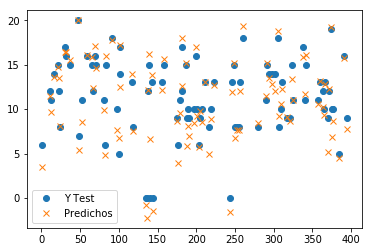

In [125]:
Y_f = y_test
Y_f['predict']= predict_r
fig, ax = plt.subplots()
ax.plot(Y_f.G3,'o',label ='Y Test')
ax.plot(Y_f.predict,'x',label ='Predichos')
plt.legend()
plt.show()

##### Como se sabe que G3 es el promedio final en base a G1 y G2, se realizara el analisis de predecir las notas G3 solamente conociendo las notas del G1

In [126]:
lista = list(df.columns)
lista.remove('G3')
lista.remove('G2')
modelo_str = ' + '.join(lista)
modelo_str = 'G3 ~ '+modelo_str
modelo_str
modelo = smf.ols(formula= str(modelo_str),data=df).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     16.28
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           6.73e-49
Time:                        11:39:51   Log-Likelihood:                -648.76
No. Observations:                 284   AIC:                             1380.
Df Residuals:                     243   BIC:                             1529.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.8070      3.108      0.581      0.561      -4.314       7.928
school                1.3462      0.591      2.278      0.024       0.182       2.511
sex                   0.1749      0.385      0.454      0.650      -0.583       0.933
age                  -0.2453      0.164     -1.497      0.136      -0.568       0.077
address              -0.8648      0.432     -2.004      0.046      -1.715      -0.015
famsize               0.0174      0.391      0.045      0.965      -0.752       0.787
Pstatus               0.8053      0.577      1.397      0.164      -0.330       1.941
Medu                  0.3036      0.250      1.215      0.226      -0.189       0.796
Fedu                 -0.4732      0.210     -2.259      0.025      -0.886      -0.061
traveltime           -0.1098      0.258     -0.426      0.670      -0.618       0.398
studytime            -0.1778      0.219     -0.811      0.418      -0.610       0.254
failures             -0.2461      0.258     -0.953      0.342      -0.755       0.263
schoolsup             0.8812      0.510      1.728      0.085      -0.123       1.885
famsup               -0.1639      0.369     -0.444      0.657      -0.891       0.563
paid                  0.4913      0.357      1.375      0.170      -0.212       1.195
activities            0.1074      0.329      0.327      0.744      -0.541       0.756
nursery              -0.1126      0.403     -0.279      0.780      -0.907       0.682
higher               -0.5163      0.779     -0.663      0.508      -2.050       1.018
internet             -0.3435      0.445     -0.773      0.440      -1.219       0.532
romantic             -0.7956      0.354     -2.250      0.025      -1.492      -0.099
famrel                0.3270      0.189      1.731      0.085      -0.045       0.699
freetime              0.0583      0.172      0.339      0.735      -0.281       0.398
goout                -0.3972      0.181     -2.190      0.029      -0.754      -0.040
Dalc                 -0.4693      0.253     -1.852      0.065      -0.968       0.030
Walc                  0.5829      0.186      3.131      0.002       0.216       0.950
health               -0.0740      0.127     -0.585      0.559      -0.323       0.175
absences              0.0388      0.022      1.795      0.074      -0.004       0.081
G1                    1.0953      0.057     19.304      0.000       0.984       1.207
Mjob_health           0.2375      0.816      0.291      0.771      -1.370       1.845
Mjob_other            0.8591      0.531      1.618      0.107      -0.187       1.905
Mjob_services         0.3136      0.599      0.523      0.601      -0.867       1.494
Mjob_teacher          0.1437      0.743      0.193      0.847      -1.321       1.608
Fjob_health           0.5178      1.158      0.447      0.655      -1.762

* Se depura el modelo

In [127]:
modelo = smf.ols(formula= 'G3 ~ address+ Fedu + romantic + goout + Walc + G1',data=df).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     95.26
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           2.05e-64
Time:                        11:42:57   Log-Likelihood:                -674.79
No. Observations:                 284   AIC:                             1364.
Df Residuals:                     277   BIC:                             1389.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3309      0.864     -0.383      0.702      -2.032       1.370
address       -0.9486      0.370     -2.566      0.011      -1.676      -0.221
Fedu          -0.1695      0.146     -1.157      0.248      -0.458       0.119
romantic      -0.9010      0.332     -2.715      0.007      -1.554      -0.248
goout         -0.4201      0.168     -2.498      0.013      -0.751      -0.089
Walc           0.4129      0.138      2.983      0.003       0.140       0.685
G1             1.1030      0.050     22.079      0.000       1.005       1.201
==============================================================================
Omnibus:                       83.761   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.407
Skew:                          -1.418   Prob(JB):                     2.24e-43
Kurtosis:                       5.925   Cond. No.                         68.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
modelo = smf.ols(formula= 'G3 ~ address + romantic + goout + Walc + G1',data=df).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     113.9
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           3.53e-65
Time:                        11:47:04   Log-Likelihood:                -675.47
No. Observations:                 284   AIC:                             1363.
Df Residuals:                     278   BIC:                             1385.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6195      0.828     -0.749      0.455      -2.249       1.010
address       -0.9284      0.369     -2.513      0.013      -1.656      -0.201
romantic      -0.9043      0.332     -2.724      0.007      -1.558      -0.251
goout         -0.4296      0.168     -2.556      0.011      -0.761      -0.099
Walc           0.4144      0.138      2.992      0.003       0.142       0.687
G1             1.0923      0.049     22.233      0.000       0.996       1.189
==============================================================================
Omnibus:                       87.799   Durbin-Watson:                   1.441
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.474
Skew:                          -1.458   Prob(JB):                     3.62e-48
Kurtosis:                       6.157   Cond. No.                         64.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
X_r = df.loc[:,['address','romantic','goout','Walc','G1']]
Y_r = df.loc[:,['G3']]
x_train,x_test,y_train,y_test = train_test_split(X_r,Y_r,test_size=.33,random_state=76)
modelo_r = linear_model.LinearRegression()
modelo_r.fit(x_train,y_train)
predict_r = modelo_r.predict(x_test)
report_scores(predict_r,y_test)

El error cuadratico medio para el modelo es: 4.81634375147048
El error r2_score para el modelo es: 0.7395391855905236


/Users/moisesquiroz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


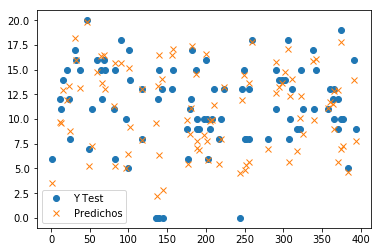

In [132]:
Y_f = y_test
Y_f['predict']= predict_r
fig, ax = plt.subplots()
ax.plot(Y_f.G3,'o',label ='Y Test')
ax.plot(Y_f.predict,'x',label ='Predichos')
plt.legend()
plt.show()

#### Se observa que la mayor parte de significancia de los modelos finalmente pertenecen a G1 y G2, se analiza un modelo predictivo solo con estas variables

In [133]:
X_r = df.loc[:,['G2','G1']]
Y_r = df.loc[:,['G3']]
x_train,x_test,y_train,y_test = train_test_split(X_r,Y_r,test_size=.33,random_state=76)
modelo_r = linear_model.LinearRegression()
modelo_r.fit(x_train,y_train)
predict_r = modelo_r.predict(x_test)
report_scores(predict_r,y_test)

El error cuadratico medio para el modelo es: 2.1419904425311898
El error r2_score para el modelo es: 0.8841642947622552


# Conclusiones

Se observo que finalmente las notas se encuentran muy relacionadas entre si, al final G3 es un promedio de G1 y G2, finalmente se podria decir que lo que mas importa al promedio final son las notas que te haz sacado en el pasado independiente de los demas factores internos, como cuando por ejemplo predijimos G3 solo a partir de G1